In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
# Load and clean
df = pd.read_csv(filepath_or_buffer="datasets/genres_v2.csv")
print(df.shape)
print(df.isnull().sum())

(42305, 22)
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64


/tmp/ipykernel_1700/2326091488.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath_or_buffer="datasets/genres_v2.csv")


In [24]:
# EDA (Exploratory Data Analysis)
print(df.describe())

# Possible target variables = valence: a measure of happiness that describes the musical positiveness conveyed by a track.
# Low valence = (sad, depressed, angry)
# High valence = (happy, cheerful, euphoric)
# Future TODO: Can we back this up with the lyrics?
# Possible feature variables = energy, loudness, danceability, speechiness, acousticness, instrumentalness and liveness

       danceability        energy           key      loudness          mode  \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.639364      0.762516      5.370240     -6.465442      0.549462   
std        0.156617      0.183823      3.666145      2.941165      0.497553   
min        0.065100      0.000243      0.000000    -33.357000      0.000000   
25%        0.524000      0.632000      1.000000     -8.161000      0.000000   
50%        0.646000      0.803000      6.000000     -6.234000      1.000000   
75%        0.766000      0.923000      9.000000     -4.513000      1.000000   
max        0.988000      1.000000     11.000000      3.148000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  42305.000000  42305.000000      42305.000000  42305.000000   
mean       0.136561      0.096160          0.283048      0.214079   
std        0.126168      0.170827          0.370791      0.175576   
min        0

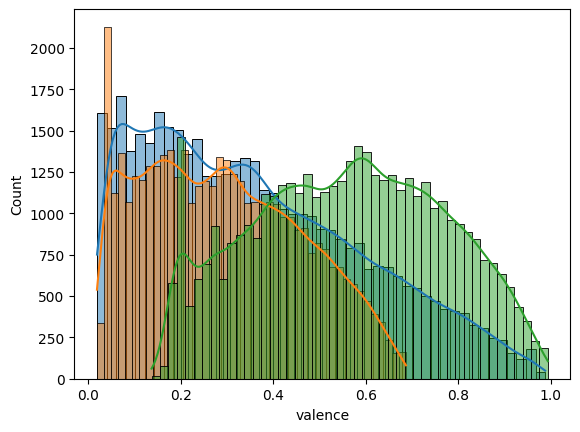

In [25]:
# EDA for target variable
import seaborn as sb
sb.histplot(df['valence'], kde=True)

# This shows us that our target variable is significantly right-skewed which could impact our results.
# Linear regression assumes that the target variable is approximately normally distributed around predictions.
# Linear regression is also sensitive to outliers.
# We need to perform transformations to reduce skeweness

sb.histplot(np.log1p(df['valence']), kde=True)

sb.histplot(np.sqrt(df['valence']), kde=True)

df['valence'] = np.sqrt(df['valence'])

In [27]:
# For this instance, we'll use the square root transformation of the valence column.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

x = df[['danceability', 'loudness', 'liveness', 'instrumentalness','acousticness', 'speechiness', 'tempo',]]
y = df['valence']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [30]:
# we'll evaluate the predictions with MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}, RMSE: {rmse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MSE: 0.032291863323411926, RMSE: 0.17969936929052346
MAE: 0.14778602200139535
